# Plan et objectives

En Analysant le problème , on peut voir l'utilité des données: avec quelle precision peut-on suivre le payement de nos clients mois par mois..Autrement dit, comment nos modéles peuvent être assez pertinentes en utilisant les données de premiéres deux mois et prendre en considération l'historique de payement pour une durée de 6 mois?

## Exploration et compréhension des données

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv("default-of-credit-card-clients.csv")
data.head(10)

data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
# Voir si on a des valeurs manquantes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

Absence de valeurs manquantes dans notre Dataset..

In [8]:
# Categorical variables description
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


*EDUCATION a deux variables catégoriques qui ne sont pas labilisés et la variable 0 non documenté

*MARRIAGE  a le label qui n'est pas documenté

In [9]:
# Payment delay description
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [10]:
# Bill Statement description
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
#Previous Payment Description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

l'intervalle est un peu étendue on va devoir procéder à une remise a l'échelle (Data Scailling)

In [13]:
data = data.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
# Probabilité d'avoir un payement:
data.def_pay.sum() / len(data.def_pay)

0.2212

On va distinguer les clients suivant la variable cible pour connaitre les caractéristiques de chaque groupe

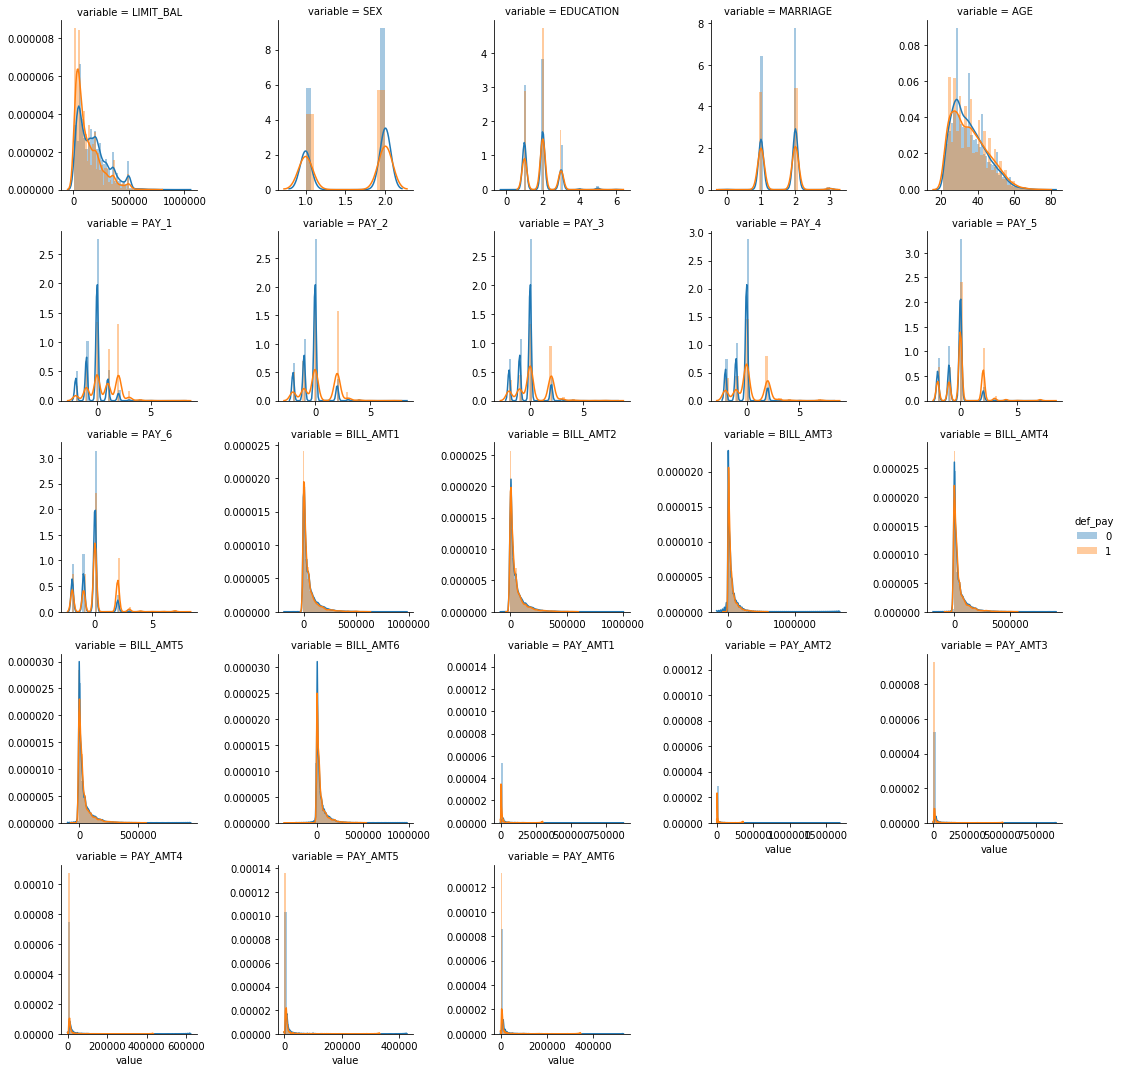

In [15]:
output = 'def_pay'

cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False,sharey=False)
g = g.map( sns.distplot, "value", kde=True).add_legend()

NB:

*Defaults have a higher proportion of Lower LIMIT_BAL values

*NonDefaults have a higher proportion of Females (Sex=2)

*NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)

*NonDefaults have a higher proportion of Singles (MARRIAGE=2)

*NonDefaults have a higher proportion of people 30-40 years

*NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!



## Variables catégoriques

In [16]:
data.SEX.value_counts() 

2    18112
1    11888
Name: SEX, dtype: int64

In [17]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
data.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

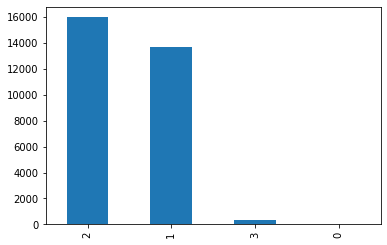

In [19]:
data.MARRIAGE.value_counts().plot(kind = 'bar')

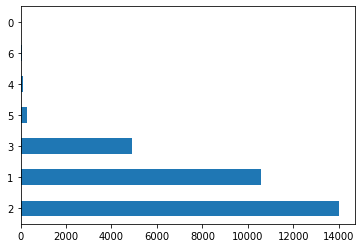

In [20]:
data.EDUCATION.value_counts().plot(kind = "barh")

## Variables numériques

In [21]:
def draw_histograms(data, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        data[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

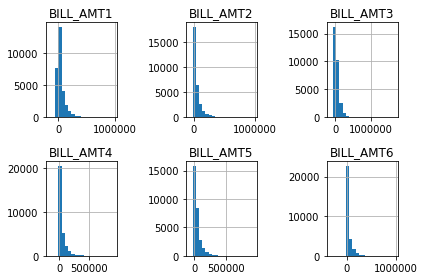

In [22]:
bills = data[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

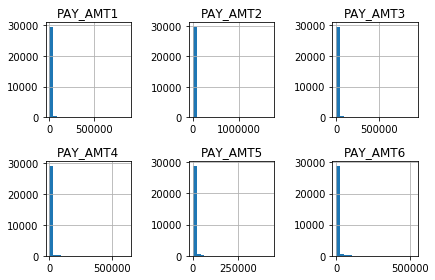

In [23]:
pay = data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

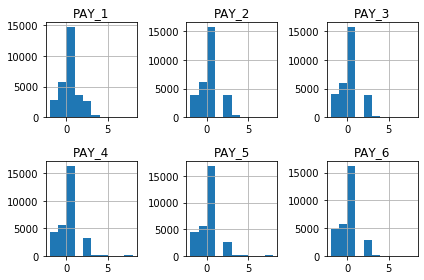

In [24]:
late = data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

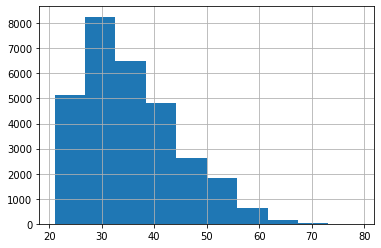

In [25]:
data.AGE.hist()

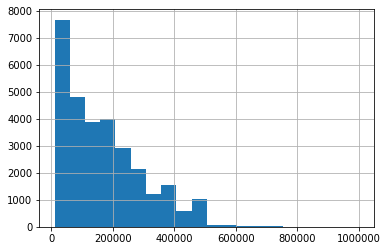

In [26]:
data.LIMIT_BAL.hist(bins = 20)

## Data Cleaning 

In [27]:
#Mettre le label 0 qui n'est documenté anisi que les valeurs 5 et 6 qui ne sont pas labilisés avec Other(4)
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [28]:
#Même raisonnement pour la variable Marriage:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

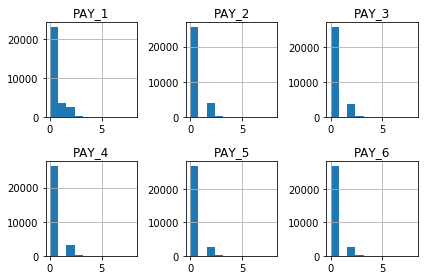

In [29]:
#Remplacer les valeurs négatives dans les variables de payement avec des zéros (c'est plus logique)
fil = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[fil, 'PAY_1'] = 0
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_5'] = 0
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0
late = data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

## Analyses profondes

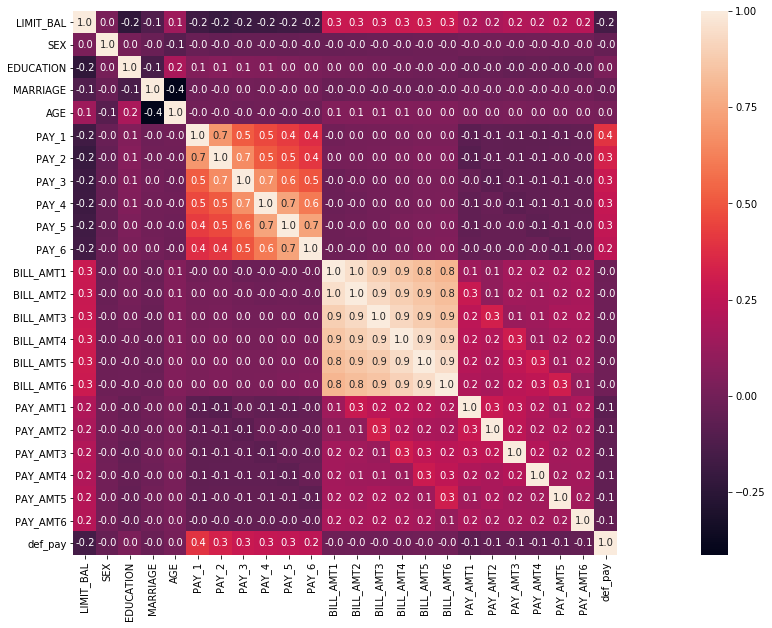

In [30]:
#Matrice de corrélation
corr = data.iloc[:,1:].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" ) 

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and Log_PAY_AMT variables.

To make predictions about whether a customer is likely to default - we'll train a number of different classifiers and see how well they perform. As usual, we start by splitting the data into train/test sets and rescaling.

In [31]:
data.groupby(['SEX', 'def_pay']).size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [32]:
gender = data.groupby(['SEX', 'def_pay']).size().unstack(1)
gender

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [33]:
pd.crosstab(data.SEX, data.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


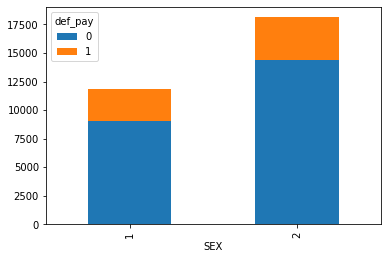

In [34]:
gender.plot(kind='bar', stacked = True)

In [35]:
data[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


Considering that about 22% of the customers will default, we see a couple of things:

    there are significantly more women than men
    
    men are most likely going to default the next month

In [36]:
data[["EDUCATION", "def_pay"]].groupby(['EDUCATION']).mean().sort_values(by='def_pay')

,def_pay
EDUCATION,
4,0.070513
1,0.192348
2,0.237349
3,0.251576


it seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.

In [37]:
data[["MARRIAGE", "def_pay"]].groupby(['MARRIAGE']).mean().sort_values(by='def_pay')

,def_pay
MARRIAGE,
2,0.209283
1,0.234717
3,0.236074


Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

All considered, these three categories seem to affect the result we want to predict. Thus we keep them in mind for later.

We try to explain these first results and, while we can imagine how marital status or education can determine the balance of the credit card, we can't find a way of explaining why the type of genitals can do that as well. This particular result could probably get more meaning when put in the context of the society this people belong to.

## Feature Engineering

In [38]:
data['SE_MA'] = data.SEX * data.MARRIAGE
data[['SE_MA', "def_pay"]].groupby(['SE_MA']).mean().sort_values(by='def_pay')

,def_pay
SE_MA,
4,0.197216
6,0.202586
2,0.222673
1,0.259345
3,0.289655


In [39]:
def corr_2_cols(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [40]:
data['SE_MA_2'] = 0
data.loc[((data.SEX == 1) & (data.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
data.loc[((data.SEX == 1) & (data.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
data.loc[((data.SEX == 1) & (data.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
data.loc[((data.SEX == 2) & (data.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
data.loc[((data.SEX == 2) & (data.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
data.loc[((data.SEX == 2) & (data.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [41]:
del data['SE_MA']
data = data.rename(columns={'SE_MA_2': 'SE_MA'})

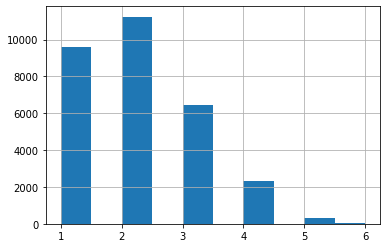

In [42]:
data['AgeBin'] = 0 #creates a column of 0
data.loc[((data['AGE'] > 20) & (data['AGE'] < 30)) , 'AgeBin'] = 1
data.loc[((data['AGE'] >= 30) & (data['AGE'] < 40)) , 'AgeBin'] = 2
data.loc[((data['AGE'] >= 40) & (data['AGE'] < 50)) , 'AgeBin'] = 3
data.loc[((data['AGE'] >= 50) & (data['AGE'] < 60)) , 'AgeBin'] = 4
data.loc[((data['AGE'] >= 60) & (data['AGE'] < 70)) , 'AgeBin'] = 5
data.loc[((data['AGE'] >= 70) & (data['AGE'] < 81)) , 'AgeBin'] = 6
data.AgeBin.hist()

In [43]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,225,89,0.283439
6,18,7,0.280000


In [44]:
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3281,6337,0.658869
2,4565,6673,0.593789
3,2771,3693,0.571318
4,1092,1249,0.533533
5,166,148,0.471338
6,13,12,0.480000


we see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [45]:
data['SE_AG'] = 0
data.loc[((data.SEX == 1) & (data.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
data.loc[((data.SEX == 1) & (data.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
data.loc[((data.SEX == 1) & (data.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
data.loc[((data.SEX == 1) & (data.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
data.loc[((data.SEX == 1) & (data.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
data.loc[((data.SEX == 2) & (data.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
data.loc[((data.SEX == 2) & (data.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
data.loc[((data.SEX == 2) & (data.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
data.loc[((data.SEX == 2) & (data.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
data.loc[((data.SEX == 2) & (data.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
0,18,7,0.280000
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,122,44,0.265060
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001


## ACP

In [46]:
Y=data.iloc[:,-1].values
X=data.iloc[:,1:-1]

In [47]:
#dimension
print(X.shape) 
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
X

(30000, 26)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SE_MA,AgeBin
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,4,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,5,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,5,2
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4,2
4,50000.0,1,2,1,57,0,0,0,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,1,2
29996,150000.0,1,3,2,43,0,0,0,0,0,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,2,3
29997,30000.0,1,2,2,37,4,3,2,0,0,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,2,2
29998,80000.0,1,3,1,41,1,0,0,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1,3


In [48]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-1.13672015  0.81016074  0.21186989 ...  1.87637834  0.40924486
  -1.11481288]
 [-0.3659805   0.81016074  0.21186989 ...  1.87637834  1.0572627
  -1.11481288]
 [-0.59720239  0.81016074  0.21186989 ... -0.53294156  1.0572627
  -0.08796651]
 ...
 [-1.05964618 -1.23432296  0.21186989 ...  1.87637834 -0.8867908
  -0.08796651]
 [-0.67427636 -1.23432296  1.55508562 ...  1.87637834 -1.53480864
   0.93887987]
 [-0.90549825 -1.23432296  0.21186989 ...  1.87637834 -1.53480864
   0.93887987]]


In [49]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))

[-6.06329801e-17  2.33058017e-16 -7.01068833e-17  1.02318154e-16
 -1.85688502e-16 -4.73695157e-18  2.17899772e-17 -2.93690997e-17
  3.31586610e-17 -3.78956126e-18 -7.57912251e-18 -1.23160741e-17
 -3.78956126e-17  6.25277607e-17  5.87381995e-17 -2.36847579e-17
  1.13686838e-17 -4.73695157e-18  1.37371596e-17  2.08425869e-17
  1.80004160e-17 -1.96583490e-17 -1.78819922e-17 -8.24229573e-17
  1.59161573e-16  1.13686838e-16]


In [50]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [51]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
pca = PCA(svd_solver='full')

In [52]:
#affichage des paramètres
print(pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [53]:
#calculs
coord = pca.fit_transform(Z)
#nombre de composantes calculées
print(pca.n_components_)

26


In [54]:
#variance expliquée
print(pca.explained_variance_)

[5.94002652e+00 4.10649634e+00 2.52254851e+00 1.72876535e+00
 1.66032825e+00 1.05890184e+00 1.02365055e+00 8.98347236e-01
 8.84185321e-01 8.70222905e-01 7.83175271e-01 7.67350899e-01
 7.50708232e-01 7.28848363e-01 5.73976047e-01 4.71522090e-01
 3.35715480e-01 2.59931110e-01 2.45078613e-01 1.88212689e-01
 7.08244962e-02 4.25013542e-02 4.10082273e-02 2.53154883e-02
 2.32255019e-02 5.94161862e-28]


In [55]:
#valeur corrigée
eigval = (n-1)/n*pca.explained_variance_
print(eigval)

[5.93982852e+00 4.10635946e+00 2.52246443e+00 1.72870772e+00
 1.66027291e+00 1.05886654e+00 1.02361643e+00 8.98317291e-01
 8.84155848e-01 8.70193897e-01 7.83149165e-01 7.67325320e-01
 7.50683208e-01 7.28824069e-01 5.73956915e-01 4.71506372e-01
 3.35704289e-01 2.59922446e-01 2.45070444e-01 1.88206415e-01
 7.08221354e-02 4.24999375e-02 4.10068604e-02 2.53146445e-02
 2.32247277e-02 5.94142057e-28]


In [56]:
#ou bien en passant par les valeurs singulières
print(pca.singular_values_**2/n)

[5.93982852e+00 4.10635946e+00 2.52246443e+00 1.72870772e+00
 1.66027291e+00 1.05886654e+00 1.02361643e+00 8.98317291e-01
 8.84155848e-01 8.70193897e-01 7.83149165e-01 7.67325320e-01
 7.50683208e-01 7.28824069e-01 5.73956915e-01 4.71506372e-01
 3.35704289e-01 2.59922446e-01 2.45070444e-01 1.88206415e-01
 7.08221354e-02 4.24999375e-02 4.10068604e-02 2.53146445e-02
 2.32247277e-02 5.94142057e-28]


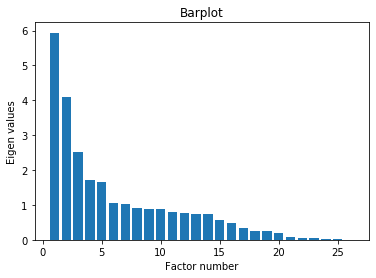

In [57]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [58]:
#proportion de variance expliquée
print(pca.explained_variance_ratio_)

[2.28454943e-01 1.57936902e-01 9.70178627e-02 6.64887585e-02
 6.38566504e-02 4.07256363e-02 3.93698627e-02 3.45506650e-02
 3.40059942e-02 3.34689961e-02 3.01211217e-02 2.95125123e-02
 2.88724311e-02 2.80316949e-02 2.20752660e-02 1.81348605e-02
 1.29117034e-02 9.99701714e-03 9.42578629e-03 7.23870829e-03
 2.72392828e-03 1.63461298e-03 1.57718694e-03 9.73640173e-04
 8.93258757e-04 2.28516176e-29]


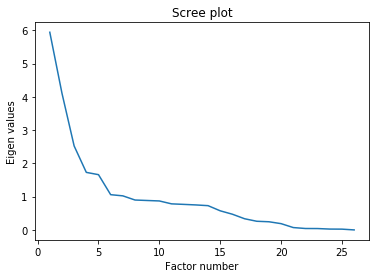

In [59]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

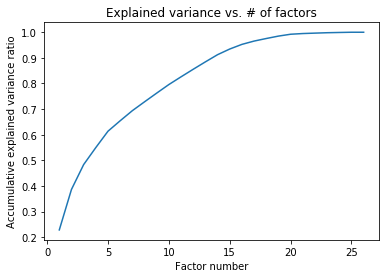

array([0.22845494, 0.38639185, 0.48340971, 0.54989847, 0.61375512,
       0.65448075, 0.69385062, 0.72840128, 0.76240728, 0.79587627,
       0.82599739, 0.85550991, 0.88438234, 0.91241403, 0.9344893 ,
       0.95262416, 0.96553586, 0.97553288, 0.98495866, 0.99219737,
       0.9949213 , 0.99655591, 0.9981331 , 0.99910674, 1.        ,
       1.        ])

In [60]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()
np.cumsum(pca.explained_variance_ratio_)

## Etude des Individus

In [61]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
     plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

KeyboardInterrupt: 

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

In [ ]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':pd.DataFrame(X).index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

In [ ]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

## Etude des variables

In [ ]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1]})

In [ ]:
#le champ components_ de l'objet ACP
print(pca.components_)

In [ ]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [ ]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)

In [ ]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

In [ ]:
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(Y,coord[:,k])[0,1]
corSupp

In [ ]:
#cercle des corrélations de premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue',clip_on=True)
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
             clip_on=True )
#affiche des variables illustratives (y)
plt.annotate('default payment next month',(corSupp[0,0],corSupp[0,1]),color='red',clip_on=True)
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
             clip_on=True)
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

In [ ]:
import pylab as pl
# PCA
pca = PCA(n_components=2)
pca.fit_transform(Z)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=pd.DataFrame(Z).columns,index = ['PC-1','PC-2']))


In [ ]:
#Connaitre les variables les plus importantes par rapport à l'acp:
import numpy as np
np.random.seed(0)

# 10 samples with 5 features
train_features = np.random.rand(10,5)

model = PCA(n_components=4).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

## LDA

In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1, solver='eigen')
reduced_data1 = lda.fit_transform(X, Y)
lda.explained_variance_ratio_

## Apprentissage supervisé

## ML avec réduction de dimension

In [ ]:
reduced_data=data[["LIMIT_BAL","EDUCATION","MARRIAGE","AGE"]]

In [ ]:
reduced_data

### Data Preprocessing

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_data, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Features Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred_logit = classifier.predict(X_test)
y_pred_logit

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_logit)
cm

In [ ]:
classifier.score(X_test, Y_test)

### XGboost

In [ ]:
from numpy import sort
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import itertools

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(X_train, Y_train)

In [ ]:
#PREDICTION
y_pred_xgb = xg_model.predict(X_test)

In [ ]:
#Evaluation du modele
test_accuracy = accuracy_score(Y_test, y_pred_xgb)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

### Data Preprocessing

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Features Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification with the whole data (Blind Machine Learning)

### Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred_logit = classifier.predict(X_test)
y_pred_logit

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_logit)
cm

In [ ]:
classifier.score(X_test, Y_test)

### K-NN

In [ ]:
#Determiner l'hyperparametere k optimale
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred_knn = classifier.predict(X_test)

In [ ]:
classifier.score(X_test, Y_test)

### SVM

In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred_svm = classifier.predict(X_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


cnf_matrix = confusion_matrix(Y_test, y_pred_svm)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
classifier.score(X_test, Y_test)

## Desicion Tree

In [ ]:
# With random Hyperparameters:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
dtc = DecisionTreeClassifier(max_depth=10, random_state=14)
dtc_model = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [ ]:
dtc_model.score(X_test, Y_test)

In [ ]:
#Optimisation des hyperparamétres:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, Y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

In [ ]:
def get_feature_importance(clsf,ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(dtc_model,X.columns)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, Y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [ ]:
#Evaluation du modéle
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, Y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, Y_test)))

In [ ]:
print(confusion_matrix(Y_test, y_pred_rfc))

In [ ]:
print(classification_report(Y_test, y_pred_rfc))

### Algorithmes de Boosting

### XGboost

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(X_train, Y_train)

In [ ]:
#PREDICTION
y_pred_xgb = xg_model.predict(X_test)

In [ ]:
#Evaluation du modele
test_accuracy = accuracy_score(Y_test, y_pred_xgb)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


cnf_matrix = confusion_matrix(Y_test, y_pred_xgb)
plot_confusion_matrix(cnf_matrix,classes=[0,1])


### G boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
GBM_model = GradientBoostingClassifier() 
GBM_model.fit(X_train, Y_train)

In [ ]:
y_pred_gbm = GBM_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_gbm))

In [ ]:
cm = confusion_matrix(Y_test, y_pred_gbm)
cm

In [ ]:
print("Accuracy score = {:0.2f}".format(accuracy_score(Y_test, y_pred_gbm)))
print("Area under ROC curve = {:0.2f}".format(roc_auc_score(Y_test, y_pred_gbm)))

In [ ]:
#============================MODEL SELECTION=================================

from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[50,100],
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    "min_samples_split":np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3, 5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse", "mae"],
    "subsample":[0.3, 0.6]
    }
grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1) 
grid.fit(X_train, Y_train) 

In [ ]:
#☺Ensuite, nous pouvons voir les paramètres optimaux:

grid.best_estimator_

#Nous passons nos données de test à la predictméthode pour obtenir les prédictions:
grid_predictions = grid.predict(X_test)



print(classification_report(Y_test, grid_predictions))

print("Accuracy score = {:0.2f}".format(accuracy_score(Y_test, grid_predictions)))
print("Area under ROC curve = {:0.2f}".format(roc_auc_score(Y_test, grid_predictions)))

## Model Selection

In [ ]:
#Courbe ROC

In [ ]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [ ]:
fpr1, tpr1, threshold1 = roc_curve(Y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(Y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(Y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(Y_test, y_pred_gbm)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(Y_test, y_pred_xgb)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(Y_test, y_pred_logit)
roc_auc6 = auc(fpr6, tpr6)

In [ ]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='brown', lw=2, label='Gboost ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='black', lw=2, label='XGboost ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='blue', lw=2, label='Logit ROC curve (area = %0.2f)'% roc_auc6)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

D'aprés la courbe ROC on a les courbes des modéles XGboost et G boost qui sont confondues et sont les plus proches de l'axe 
des ordonnées , comme leurs nom l'indique ces méthodes ensemblistes sert à booster l'accuracy d'ou le résultat

A part l'algo du knn pour sa valeur de k optimale on a la courbe Logit(regression logistique) est assez proche de ces derniers, à mon avis c'était prévisible puisque ce modéle dérive d'une variable aléatoire binomiale et s'avére efficace pour la classification binaire (soit 0 soit 1) et gére bien une grande quantité de données ce qui est notre cas (un Dataset de 30000 lignes)

## Apprentissage non supérivé

## Clustering

### K-means

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
# Pour savoir le nombre de clusters k optimal(Method Elbow)
from sklearn.cluster import KMeans
clusters = [1,2,3,4,5,6,7,8,9,10]

inertia_values = []

for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster)
    
    kmeans.fit(Z)
    
    inertia_values.append(kmeans.inertia_)
    
import seaborn as sns

sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Nombre de Clusters')
plt.ylabel("valeur d'Inertie")
plt.title("Nombre de Clusters Vs. valeur d' Inertie")
plt.show()

In [ ]:
# k=2

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)

In [ ]:
y_kmeans=kmeans.predict(Z)
cm = confusion_matrix(Y, y_kmeans)
cm

In [ ]:
plt.scatter(Z[y_kmeans == 0, 0],Z[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0],Z[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

On remarque un comportement bizarre des cluster : on a besoin d'utiliser les données réduites par ACP dans la suite

## K-means avec reduction de dimension

In [ ]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(reduced_data)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)

In [ ]:
y_kmeans=kmeans.predict(Z)
cm = confusion_matrix(Y, y_kmeans)
cm

In [ ]:
plt.scatter(Z[y_kmeans == 0, 0],Z[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0],Z[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

les données réduites ont donné un résultat bcp plus visible par rapport ce qu'on a obtenue précédement

### Clustering Hiérarchique

In [ ]:
#générer la matrice des distances
fusions = linkage(Z, method='ward',metric='euclidean')

In [ ]:
dendrogram(fusions,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.title('Dendrogram')
plt.xlabel('Clients')
plt.ylabel('distances Euclidiennes')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchie = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'complete')
y_hierarchie = hierarchie.fit_predict(Z)

plt.scatter(Z[y_hierarchie == 0, 0], Z[y_hierarchie == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(Z[y_hierarchie == 1, 0], Z[y_hierarchie == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
cm = confusion_matrix(Y, y_hierarchie)
cm

la méthode CAH a donné une meilleure segmentation que celle du k-means